# Classification - Phân loại cầu thủ và đội bóng

Notebook này thực hiện phân loại sử dụng Random Forest và Decision Tree.

## Mục tiêu:
1. Phân loại vị trí cầu thủ
2. Phân loại đội bóng vào Top 4
3. Phân loại hiệu suất cầu thủ
4. Đánh giá và so sánh models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../src')
from classification import (
    classify_player_position, classify_team_top4, classify_player_performance,
    evaluate_classification, get_feature_importance
)
from sklearn.metrics import confusion_matrix

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("✅ Đã import các modules cần thiết")


✅ Đã import các modules cần thiết


## 1. Phân loại vị trí cầu thủ


PHÂN LOẠI VỊ TRÍ CẦU THỦ
📊 Phân loại vị trí với 4 classes: ['DF', 'MF', 'FW', 'GK']

📊 Random Forest Metrics:
  accuracy: 0.783
  precision: 0.807
  recall: 0.783
  f1: 0.773

📊 Decision Tree Metrics:
  accuracy: 0.791
  precision: 0.791
  recall: 0.791
  f1: 0.791

📈 Top 15 Features (Random Forest):
                          feature  importance
4         shooting_Standard_Sh/90    0.045119
80     possession_Touches_Def 3rd    0.041017
79     possession_Touches_Def Pen    0.037130
45    passing_types_Pass Types_TI    0.036544
97                      xG_per_90    0.036294
82     possession_Touches_Att 3rd    0.026387
93         possession_Carries_Dis    0.026028
55                  gca_SCA_SCA90    0.025488
21          passing_Total_PrgDist    0.024211
94      possession_Receiving_PrgR    0.022414
81     possession_Touches_Mid 3rd    0.021989
24             passing_Medium_Cmp    0.020786
8          shooting_Standard_Dist    0.018372
40  passing_types_Pass Types_Dead    0.017902
83     p

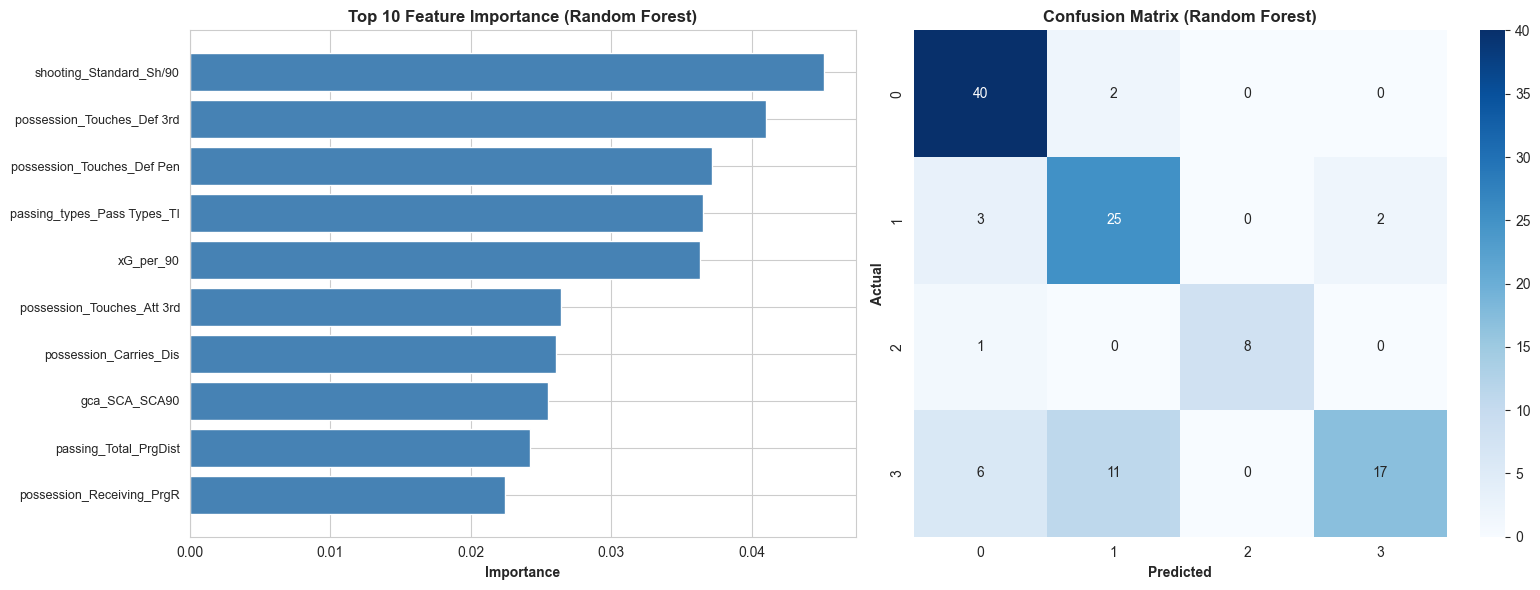

In [2]:
# Load dữ liệu
try:
    players_df = pd.read_excel('../data/players_processed.xlsx')
except:
    from data_preprocessing import load_data, feature_engineering_players, prepare_data_for_analysis
    data = load_data()
    players_df = feature_engineering_players(data['players'])
    players_df = prepare_data_for_analysis(players_df)

# Phân loại vị trí
print("="*70)
print("PHÂN LOẠI VỊ TRÍ CẦU THỦ")
print("="*70)

position_results = classify_player_position(players_df, min_samples_per_class=10)

if position_results:
    # Đánh giá Random Forest
    rf_metrics = evaluate_classification(position_results['random_forest'], 'Random Forest')
    print(f"\n📊 Random Forest Metrics:")
    for metric, value in rf_metrics.items():
        print(f"  {metric}: {value:.3f}")
    
    # Đánh giá Decision Tree
    dt_metrics = evaluate_classification(position_results['decision_tree'], 'Decision Tree')
    print(f"\n📊 Decision Tree Metrics:")
    for metric, value in dt_metrics.items():
        print(f"  {metric}: {value:.3f}")
    
    # Feature importance
    rf_importance = get_feature_importance(
        position_results['random_forest']['model'],
        position_results['random_forest']['feature_names'],
        top_n=15
    )
    
    if rf_importance is not None:
        print("\n📈 Top 15 Features (Random Forest):")
        print(rf_importance)
        
        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Feature importance
        ax1 = axes[0]
        top_features = rf_importance.head(10)
        ax1.barh(range(len(top_features)), top_features['importance'], color='steelblue')
        ax1.set_yticks(range(len(top_features)))
        ax1.set_yticklabels(top_features['feature'], fontsize=9)
        ax1.set_xlabel('Importance', fontweight='bold')
        ax1.set_title('Top 10 Feature Importance (Random Forest)', fontweight='bold')
        ax1.invert_yaxis()
        
        # Confusion Matrix
        ax2 = axes[1]
        cm = confusion_matrix(position_results['random_forest']['y_test'], 
                             position_results['random_forest']['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
        ax2.set_xlabel('Predicted', fontweight='bold')
        ax2.set_ylabel('Actual', fontweight='bold')
        ax2.set_title('Confusion Matrix (Random Forest)', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('../results/classification/position_classification.png', dpi=300, bbox_inches='tight')
        plt.show()


## 2. Phân loại đội bóng Top 4


PHÂN LOẠI ĐỘI BÓNG TOP 4
📊 Phân loại Top 4: 4 đội trong Top 4

📊 Random Forest Metrics:
  accuracy: 1.000
  precision: 1.000
  recall: 1.000
  f1: 1.000

📊 Decision Tree Metrics:
  accuracy: 1.000
  precision: 1.000
  recall: 1.000
  f1: 1.000


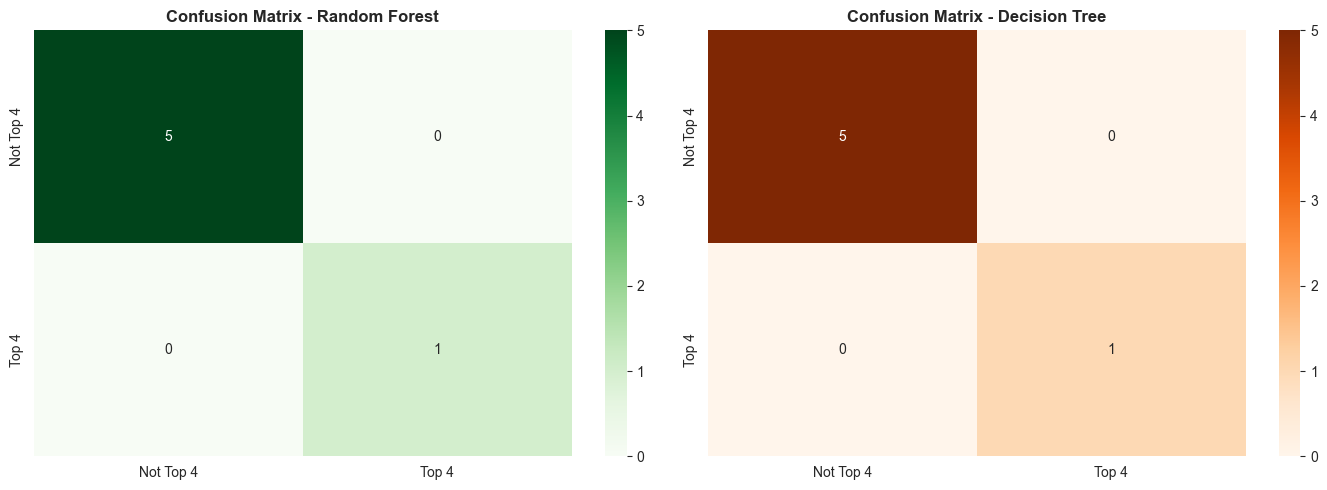

In [3]:
# Load dữ liệu đội bóng
try:
    teams_df = pd.read_excel('../data/teams_processed.xlsx')
except:
    from data_preprocessing import load_data, feature_engineering_teams, prepare_data_for_analysis
    data = load_data()
    teams_merged = feature_engineering_teams(data['teams_for'], data['teams_vs'])
    if teams_merged is not None:
        teams_df = prepare_data_for_analysis(teams_merged, target_cols=['Squad'])
    else:
        teams_df = None

if teams_df is not None:
    print("="*70)
    print("PHÂN LOẠI ĐỘI BÓNG TOP 4")
    print("="*70)
    
    top4_results = classify_team_top4(teams_df)
    
    if top4_results:
        # Đánh giá
        rf_metrics = evaluate_classification(top4_results['random_forest'], 'Random Forest')
        dt_metrics = evaluate_classification(top4_results['decision_tree'], 'Decision Tree')
        
        print(f"\n📊 Random Forest Metrics:")
        for metric, value in rf_metrics.items():
            print(f"  {metric}: {value:.3f}")
        
        print(f"\n📊 Decision Tree Metrics:")
        for metric, value in dt_metrics.items():
            print(f"  {metric}: {value:.3f}")
        
        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Confusion Matrix RF
        ax1 = axes[0]
        cm_rf = confusion_matrix(top4_results['random_forest']['y_test'], 
                                 top4_results['random_forest']['predictions'])
        sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax1, 
                   xticklabels=['Not Top 4', 'Top 4'], yticklabels=['Not Top 4', 'Top 4'])
        ax1.set_title('Confusion Matrix - Random Forest', fontweight='bold')
        
        # Confusion Matrix DT
        ax2 = axes[1]
        cm_dt = confusion_matrix(top4_results['decision_tree']['y_test'], 
                                top4_results['decision_tree']['predictions'])
        sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=ax2,
                   xticklabels=['Not Top 4', 'Top 4'], yticklabels=['Not Top 4', 'Top 4'])
        ax2.set_title('Confusion Matrix - Decision Tree', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('../results/classification/top4_classification.png', dpi=300, bbox_inches='tight')
        plt.show()
else:
    print("⚠️ Không có dữ liệu đội bóng")


PHÂN LOẠI HIỆU SUẤT CẦU THỦ
📊 Phân loại hiệu suất:
Performance_Class
Average          158
Elite            145
Good             143
Below_Average    128
Name: count, dtype: int64

📊 Random Forest Metrics:
  accuracy: 0.852
  precision: 0.860
  recall: 0.852
  f1: 0.855

📊 Decision Tree Metrics:
  accuracy: 0.817
  precision: 0.838
  recall: 0.817
  f1: 0.819


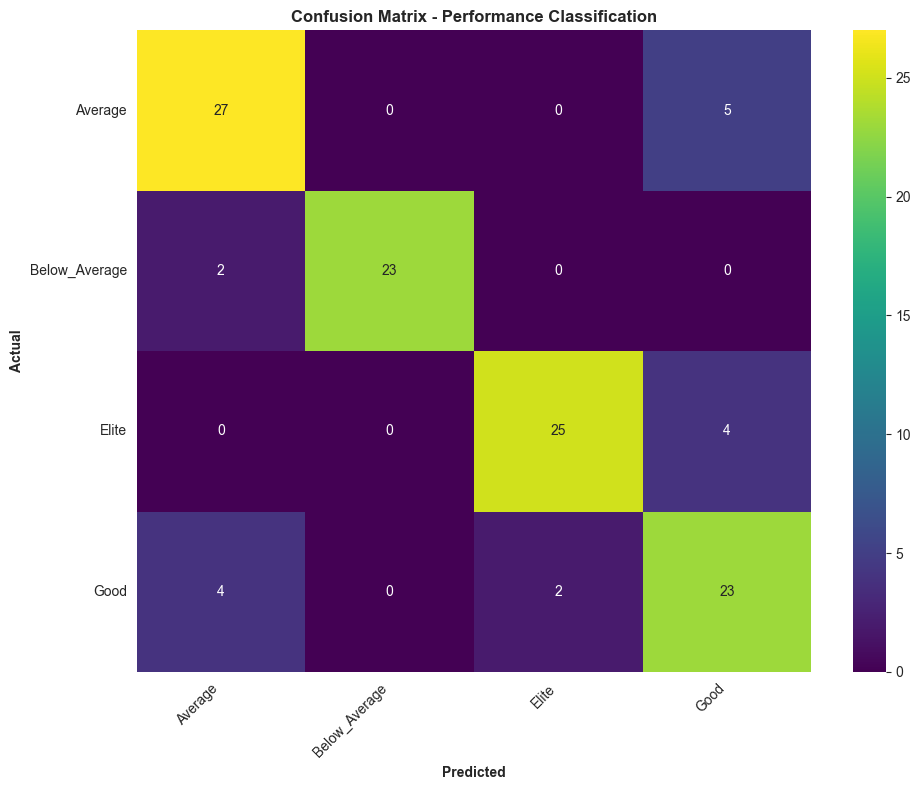


✅ Đã lưu kết quả classification


In [4]:
# Phân loại hiệu suất
print("="*70)
print("PHÂN LOẠI HIỆU SUẤT CẦU THỦ")
print("="*70)

performance_results = classify_player_performance(players_df)

if performance_results:
    # Đánh giá
    rf_metrics = evaluate_classification(performance_results['random_forest'], 'Random Forest')
    dt_metrics = evaluate_classification(performance_results['decision_tree'], 'Decision Tree')
    
    print(f"\n📊 Random Forest Metrics:")
    for metric, value in rf_metrics.items():
        print(f"  {metric}: {value:.3f}")
    
    print(f"\n📊 Decision Tree Metrics:")
    for metric, value in dt_metrics.items():
        print(f"  {metric}: {value:.3f}")
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 8))
    cm = confusion_matrix(performance_results['random_forest']['y_test'], 
                         performance_results['random_forest']['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax)
    le = performance_results['random_forest']['label_encoder']
    class_names = le.classes_
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_yticklabels(class_names, rotation=0)
    ax.set_xlabel('Predicted', fontweight='bold')
    ax.set_ylabel('Actual', fontweight='bold')
    ax.set_title('Confusion Matrix - Performance Classification', fontweight='bold')
    plt.tight_layout()
    plt.savefig('../results/classification/performance_classification.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Đã lưu kết quả classification")
